In [1]:
import boolean2 as b2
import boolean2, pylab
from boolean2 import util
import matplotlib.pyplot as plt

Model rules:

- Trastuzumab inhibits HER2
- HER2 activates ERK1/2
- HER2 activates JNK1/2
- HER2 activates P38
- ERK1/2 activates DUSP16
- DUSP16 inhibits JNK1/2
- DUSP16 inhibits P38
- ERK1/2 activates Survival
- JNK1/2 and P38 together inhibit Survival

# Develop a Boolean model for HER2+ breast cancer

In [13]:
# HER2+ breast cancer has overexpressed HER2, so without treatment, it will be ON by the default
print("Prior to Trastuzumab treatment when HER2 is ON:")

model_definition = """

# Initial values 
HER2 = True
ERK12 = Random
JNK12 = Random
P38 = Random
DUSP16 = Random
Survival = True

# Update rules
ERK12* = HER2
JNK12* = HER2 or not DUSP16
P38* = HER2 or not DUSP16
DUSP16* = ERK12
Survival* = ERK12 or not (JNK12 and P38)
"""

model = b2.Model(text = model_definition, mode = 'async')
model.initialize()
model.iterate(steps = 100) # Change to 10 when exporting figures

# Assess whether the model converges to a steady state or a limit cycle
for state in model.states:
    print state.HER2, state.ERK12, state.JNK12, state.P38, state.DUSP16, state.Survival
    
model.report_cycles()

Prior to Trastuzumab treatment when HER2 is ON:
True True True True False True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True True True
True True True True T

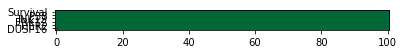

In [14]:
image = list()
for node in model.data:
    image.append(model.data[node])
plt.yticks(range(0,6), model.data)
plt.imshow(image, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')

plt.savefig('Fig1-no-inhibitors.png')

# Trastuzumab treatment simulation on the developed HER2+ breast cancer model

In [46]:
print("After Trastuzumab treatment when HER2 is OFF:")

model_definition = """

# Initial values 
Trastuzumab = True
HER2 = False
ERK12 = Random
JNK12 = Random
P38 = Random
DUSP16 = Random
Survival = Random

# Update rules
HER2* = not Trastuzumab
ERK12* = HER2
JNK12* = HER2 or not DUSP16
P38* = HER2 or not DUSP16
DUSP16* = ERK12
Survival* = ERK12 or not (JNK12 and P38)
"""

model = b2.Model(text = model_definition, mode = 'async')
model.initialize()
model.iterate(steps = 10) # Change to 10 when exporting figures

# Assess whether the model converges to a steady state or a limit cycle
for state in model.states:
    print state.Trastuzumab, state.HER2, state.ERK12, state.JNK12, state.P38, state.DUSP16, state.Survival
    
model.report_cycles()

After Trastuzumab treatment when HER2 is OFF:
True False False False True True True
True False False False False False True
True False False True True False True
True False False True True False False
True False False True True False False
True False False True True False False
True False False True True False False
True False False True True False False
True False False True True False False
True False False True True False False
True False False True True False False
Steady state starting at index 3 -> State: DUSP16=False, ERK12=False, HER2=False, JNK12=True, P38=True, Survival=False, Trastuzumab=True


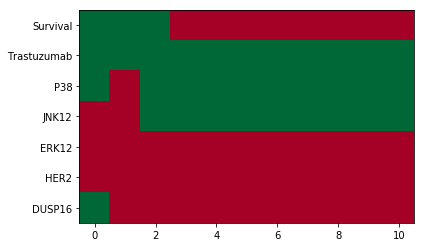

In [47]:
image = list()
for node in model.data:
    image.append(model.data[node])
plt.yticks(range(0,7), model.data)
plt.imshow(image, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')

plt.savefig('Fig2-HER2-inhibition.png')

# Simulation of the Trastuzumab + DUSP inhibitor combination therapy on the developed HER2+ breast cancer model

In [50]:
print("After DUSP inhibition:")

model_definition = """

# Initial values 
Trastuzumab = True
DUSP_inhibitor = True
HER2 = False
ERK12 = Random
JNK12 = Random
P38 = Random
DUSP16 = False
Survival = Random

# Update rules
HER2* = not Trastuzumab
ERK12* = HER2
DUSP16* = not DUSP_inhibitor
JNK12* = HER2 or not DUSP16
P38* = HER2 or not DUSP16
Survival* = ERK12 or not (JNK12 and P38)
"""

model = b2.Model(text = model_definition, mode = 'async')
model.initialize()
model.iterate(steps = 10) # Change to 10 when exporting figures

# Assess whether the model converges to a steady state or a limit cycle
for state in model.states:
    print state.Trastuzumab, state.DUSP_inhibitor, state.HER2, state.ERK12, state.JNK12, state.P38, state.DUSP16, state.Survival
    
model.report_cycles()

After DUSP inhibition:
True True False False True False False True
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
True True False False True True False False
Steady state starting at index 1 -> State: DUSP16=False, DUSP_inhibitor=True, ERK12=False, HER2=False, JNK12=True, P38=True, Survival=False, Trastuzumab=True


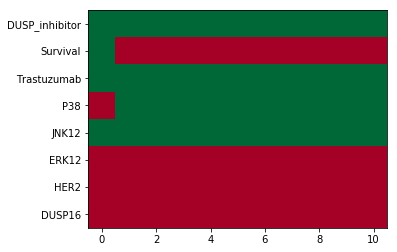

In [51]:
image = list()
for node in model.data:
    image.append(model.data[node])
plt.yticks(range(0,8), model.data)
plt.imshow(image, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')

plt.savefig('Fig3-double-inhibition.png')